# Lab2: Decision Trees

### Дабеска Мила 193263

&nbsp;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import seaborn as sn
import graphviz
from IPython.display import Image
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('history-of-rock-spotify.csv')
dataset.drop(['index', 'danceability.1'], axis=1, inplace = True)
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734


In [3]:
features = dataset.columns.drop(['key'])
labels = ['key']

X = dataset[features]
Y = dataset[labels]

In [4]:
dataset.key.value_counts()

9     765
2     739
7     715
0     657
4     548
1     388
5     381
11    351
6     319
10    259
8     233
3     129
Name: key, dtype: int64

### Create decision tree

In [12]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [6]:
# encoder = dataset.apply(LabelEncoder().fit_transform)
# encoder.head()

encoder =  LabelEncoder()
X['artist'] = encoder.fit_transform(X['artist'])
X.head()

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,1991,5.032000,74,0.502,0.000025,0.912,0.000173,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,772,1971,8.047167,78,0.338,0.580000,0.340,0.003200,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,1045,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,704,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,1516,1965,3.713550,77,0.723,0.038300,0.863,0.031700,0.1280,-7.890,0.0338,136.302,4,0.931


### Split data

In [13]:
trainX,testX,trainY,testY = train_test_split(X, Y, test_size=0.2)

In [14]:
trainX, trainY

(                                                  artist  release_date  \
 name                                                                     
 Copacabana (At the Copa)                             121          2006   
 Don't Be Cruel                                       442          1958   
 I Wanna Rock                                        1646          1984   
 (Don't Fear) The Reaper                              189          1976   
 Working on the Highway                               226          1984   
 ...                                                  ...           ...   
 Rock Me                                              573          1987   
 Paradise                                             296          2011   
 A Whiter Shade of Pale - Original Single Version    1037          2019   
 Baker Street (8-Bit Computer Game Version)            12          2020   
 I Ain't Gonna Stand For It                          1260          1980   
 
                       

In [15]:
testX, testY

(                                 artist  release_date    length  popularity  \
 name                                                                          
 Pets                               1027          1993  3.612217          57   
 Closer to Fine                      640          1989  4.026667          58   
 See You Someday                     785          1992  5.447333          10   
 I Hate Children                      31          1981  1.757767          39   
 Not Fade Away - Mono Version       1516          1964  1.795333          40   
 ...                                 ...           ...       ...         ...   
 Along Comes Mary                   1335          1966  2.850000          54   
 Look Around                        1073          2011  3.466667          59   
 I Believe                           177          1995  4.457450          47   
 Hearts on Fire                      590          2002  3.856433          62   
 All My Loving - Remastered 2009    1344

In [16]:
dt.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy')

In [17]:
dot_data = export_graphviz(dt, 
                           out_file = None, 
                           feature_names = features,
                           class_names = labels,
                           filled = True, 
                           rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("history-of-rock-spotify")

IndexError: list index out of range

In [18]:
predicted = dt.predict(testX)

In [19]:
dt.feature_importances_

array([0.11343366, 0.1198243 , 0.03661834, 0.0526725 , 0.06943185,
       0.0825095 , 0.03778698, 0.06093994, 0.10377879, 0.03381122,
       0.12816849, 0.10342035, 0.        , 0.0576041 ])

In [20]:
testY.key

name
(Rock) Superstar                                            10
DOWN                                                         5
Uncle Albert / Admiral Halsey - Medley / Remastered 2012     7
Starlight (feat. Myles Kennedy)                              0
Love Shack                                                   5
                                                            ..
Lady Picture Show                                            4
Cherub Rock - Remastered 2011                                9
Suite: Judy Blue Eyes - 2005 Remaster                        9
Open My Eyes                                                 9
Miss Misery (Early Version)                                  3
Name: key, Length: 1097, dtype: int64

In [21]:
result_df = pd.DataFrame({"actual":testY.key,"predicted":predicted})
result_df

,actual,predicted
name,,
(Rock) Superstar,10,7
DOWN,5,9
Uncle Albert / Admiral Halsey - Medley / Remastered 2012,7,7
Starlight (feat. Myles Kennedy),0,2
Love Shack,5,2
...,...,...
Lady Picture Show,4,2
Cherub Rock - Remastered 2011,9,7
Suite: Judy Blue Eyes - 2005 Remaster,9,9


In [22]:
confusion_matrix = pd.crosstab(result_df['actual'], result_df['predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
0,9,4,36,0,3,5,0,43,0,28,1,9
1,9,4,17,0,3,1,0,15,0,24,1,4
2,16,11,38,3,3,1,0,42,0,37,0,6
3,8,1,3,2,2,2,0,6,0,3,1,1
4,11,8,26,1,3,2,0,24,0,24,2,5
5,9,6,15,0,2,3,1,16,1,17,0,10
6,5,6,16,0,3,0,0,18,1,11,0,4
7,16,8,32,0,7,2,0,39,1,16,2,5
8,5,4,10,0,1,1,0,12,0,7,2,7


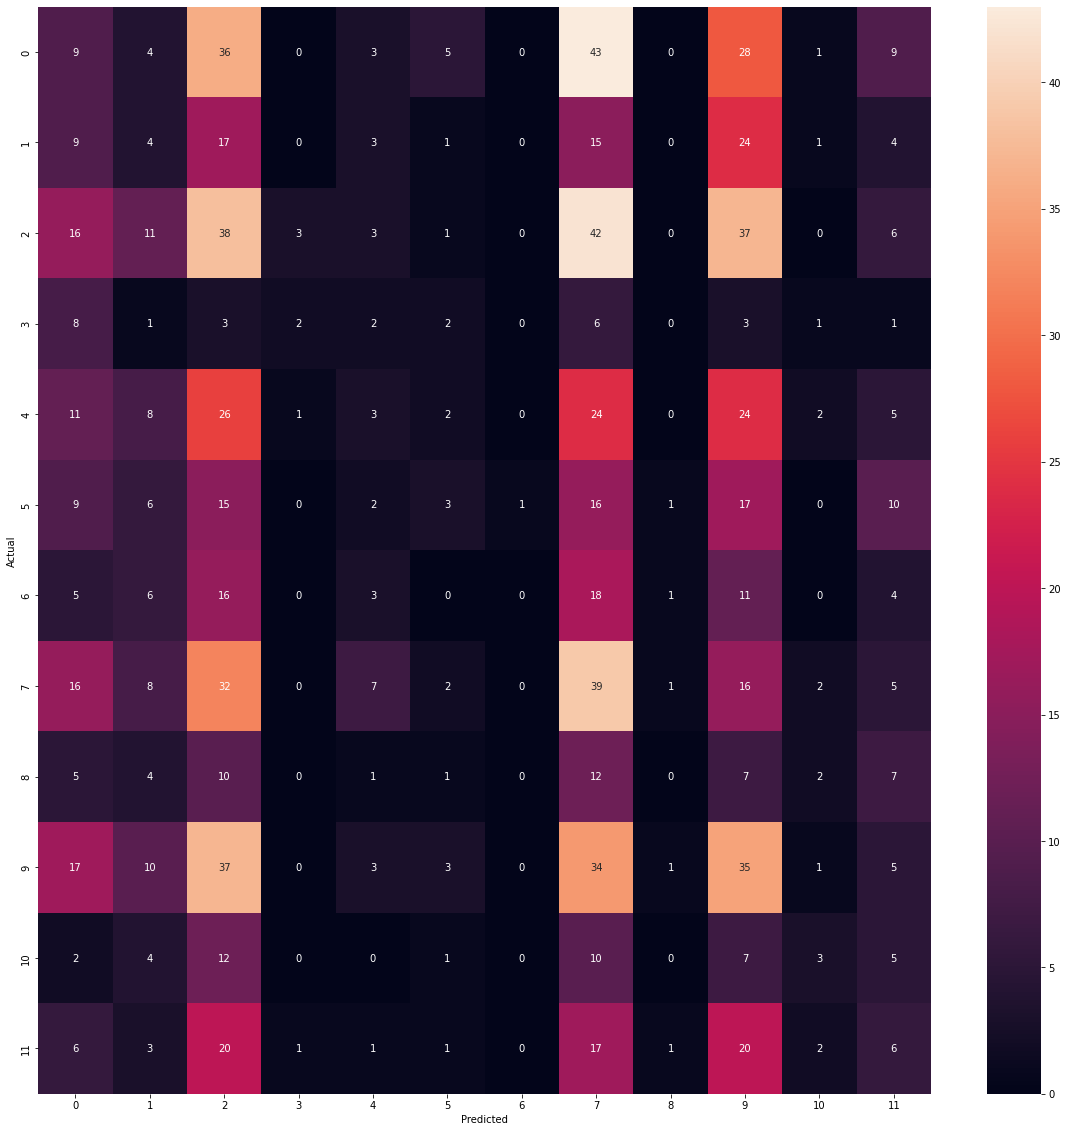

In [23]:
fig = plt.figure(figsize=(20,20))
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [24]:
accuracy_score(result_df['actual'], result_df['predicted'])

0.12944393801276208

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

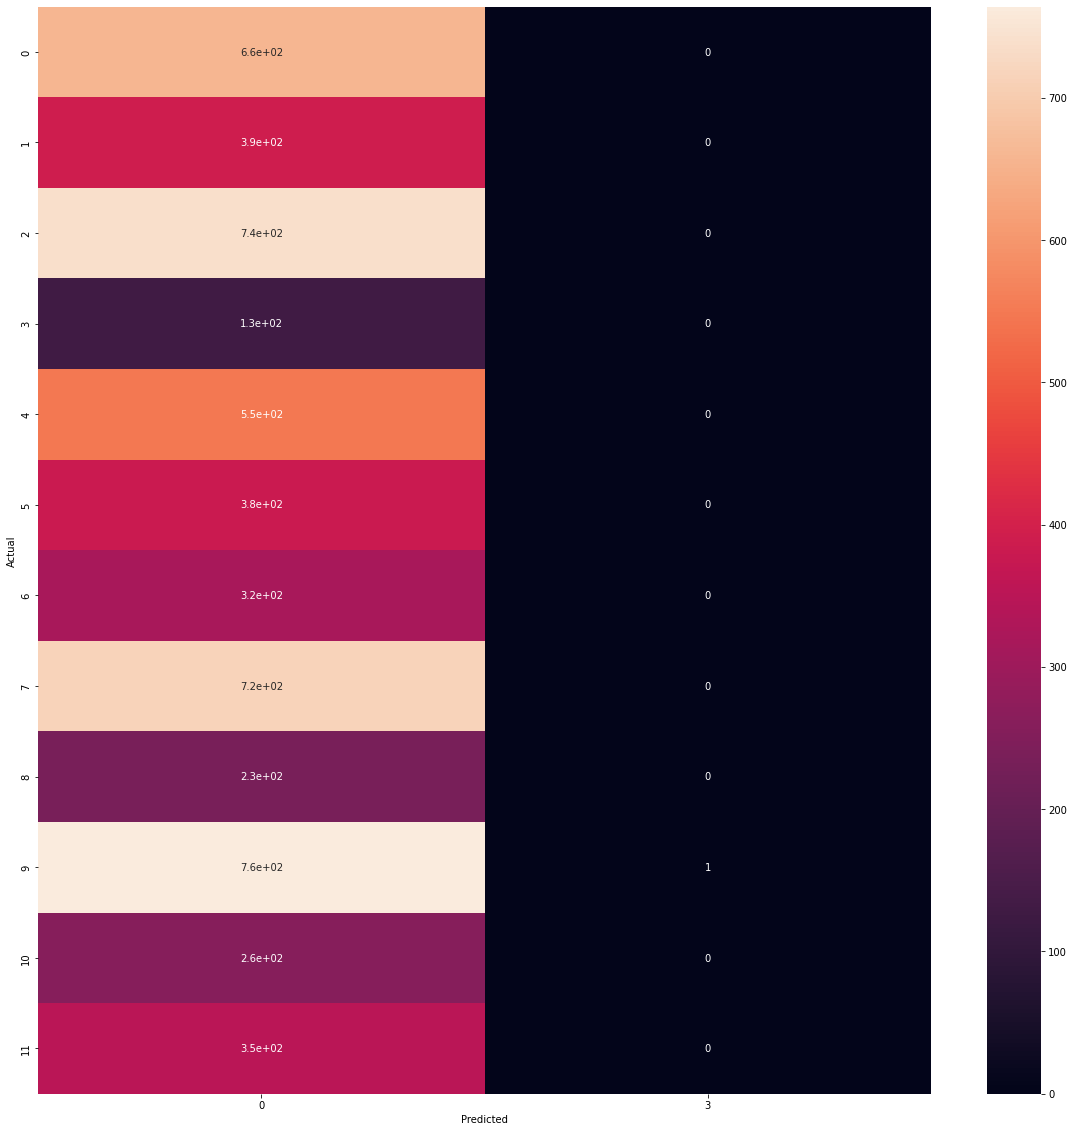

In [53]:
loo = LeaveOneOut()

X = encoder[['artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']].to_numpy()
y = encoder[['key']].to_numpy()

# X = encoder[[features]].to_numpy()
# y = encoder[[labels]].to_numpy()

predicted = []
actual = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt.fit(trainX,trainY)
    predicted_value = dt.predict(X_test)
    predicted.append(predicted_value[0])
    actual.append(y_test[0][0])
    
print(predicted)
print(actual)

result_df = pd.DataFrame({"actual":actual,"predicted":predicted})
confusion_matrix = pd.crosstab(result_df['actual'], result_df['predicted'], rownames=['Actual'], colnames=['Predicted'])

fig = plt.figure(figsize=(20,20))
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [54]:
accuracy_score(actual, predicted)

0.11980306345733041

In [55]:
precision_score(actual, predicted, average='micro')

0.11980306345733041

In [56]:
recall_score(actual, predicted, average='micro')

0.11980306345733041

In [57]:
f1_score(actual, predicted, average='micro')

0.11980306345733041

In [260]:
plt.figure(figsize=(10,10))
plot_roc_curve(dt, testX, testY)
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeClassifier fit on multiclass (12 classes) data

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='release_date', ylabel='Count'>

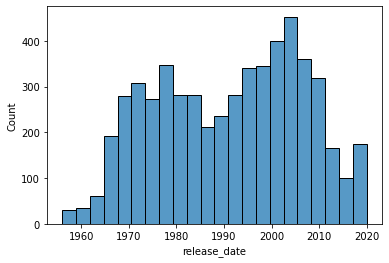

In [177]:
sn.histplot(dataset['release_date'], kde=0)

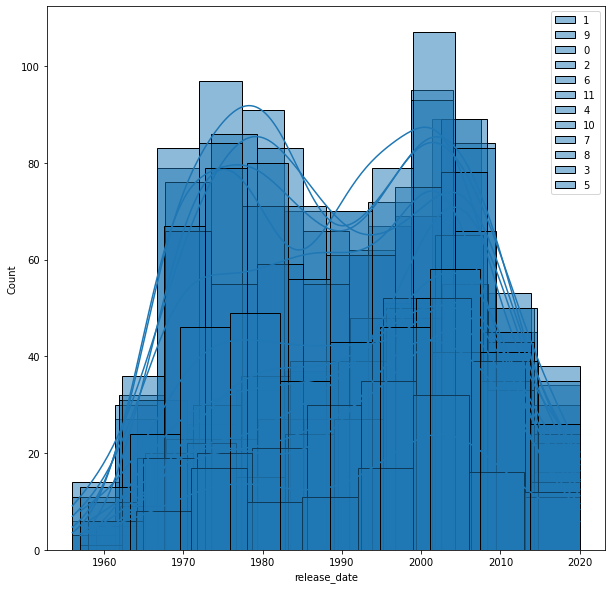

In [231]:
plt.figure(figsize=(10,10))
for i in dataset.key.unique():
    sn.histplot(dataset['release_date'][dataset.key==i], kde=True, label='{}'.format(i))
plt.legend()

In [261]:
X, y = dataset(return_X_y=True)
print(X.shape, y.shape)
dt = DecisionTreeClassifier(criterion='entropy')

TypeError: 'DataFrame' object is not callable

In [233]:
scores = cross_val_score(dt, X, y, cv=5, scoring='f1_macro')
scores

array([0.08109596, 0.07334763, 0.07010978, 0.07618149, 0.07053283])

In [236]:
print("%0.2f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.07 f1 with a standard deviation of 0.00


In [237]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(dt, X, y, cv=5, scoring=scoring)
scores

{'fit_time': array([0.31920004, 0.25017118, 0.25699067, 0.24955344, 0.2359724 ]),
 'score_time': array([0.00500011, 0.00500011, 0.00500512, 0.00500011, 0.01563907]),
 'test_precision_macro': array([0.09616857, 0.17286403, 0.08248689, 0.09920364, 0.07749902]),
 'test_recall_macro': array([0.09713736, 0.08922522, 0.08338668, 0.09014823, 0.0889913 ])}

### Prunning

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

[0.         0.00019451 0.00019451 ... 0.00095334 0.00106123 0.00164095] [0.00000000e+00 3.89010455e-04 7.78020909e-04 ... 8.97030618e-01
 8.98091852e-01 8.99732804e-01]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

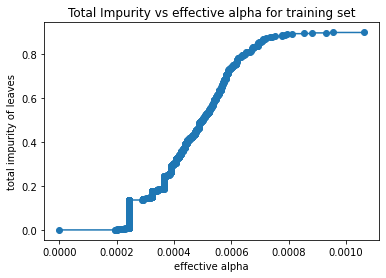

In [243]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [244]:
clfs = []
for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

Text(0, 0.5, 'total depth')

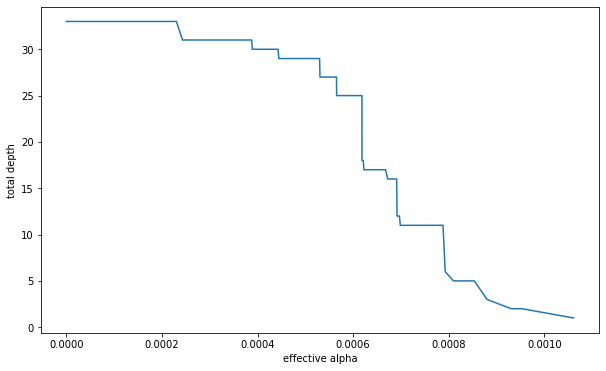

In [251]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

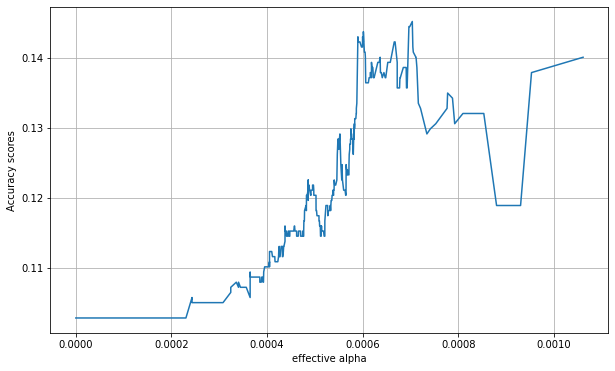

In [252]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [254]:
clf = RandomForestClassifier(max_depth=10, max_samples=15)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=15)

In [257]:
y_predicted = clf.predict(X_test)
y_predicted

array([9, 0, 9, ..., 7, 0, 9], dtype=int64)

In [256]:
y_test

array([[1],
       [9],
       [0],
       ...,
       [9],
       [7],
       [8]], dtype=int64)

In [258]:
accuracy_score(y_test, y_predicted)

0.1363967906637491

In [14]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [15]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
